## Execução obrigatória
___

Importações:

In [ ]:
from numpy import sqrt, sin, pi, linspace, cos, isnan, count_nonzero, roots, concatenate, nanmax, nanmin, arange, nan, zeros
import matplotlib.pyplot as plt

Ignorando avisos de erros que são irrelevantes para os resultados:

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

Dados necessários para as funções:

In [ ]:
M = 10
G = 1
theta = pi/2

## Informações importantes
___

### **Horizonte de eventos externo:**

$ r_S = 2M $ *(horizonte de Schwarzschild)*

$ r_H \pm = GM \pm \sqrt{G^2M^2 - a^2} $

que no caso das unidades geometrizadas:

$ r_H \pm = M \pm \sqrt{M^2 - a^2} $

<br>

### **Raio da ergosfera:**

$ r_E \pm = GM \pm \sqrt{G^2M^2 - a^2cos^2{\theta}} $

que no caso das unidades geometrizadas:

$ r_E \pm = M \pm \sqrt{M^2 - a^2cos^2{\theta}} $

<br>

### **Equação da trajetória:**

### $ \frac{dr}{d\lambda} \frac{d\lambda}{d\phi} = \frac{dr}{d\phi} = \frac{\sqrt{R}}{-\left(aE-\frac{L}{\sin^{2}\theta} \right) + \left(\frac{a}{\Delta} \right)P} $

<br>

### **Extras:**

Observador equatorial: $\; \theta = \pi/2 $

Massa adotada para o BN: $\; M = 10 $

### Potencial efetivo
___

### **Procedimento**

Para as geodésicas de Kerr:

#### $ \frac{dr}{d\lambda} = \sqrt{R} $

sendo que atendemos a condição de $ R > 0 $, na qual:

$ R = P^2 - Δ[\mu^2r^2 + (L - aE)^2 + C] $

$ P = E(r^2 + a^2) -aL $

<br>

Fazendo as substituições, obtemos:

$ R = [(r^2 + a^2)^2 - a^2Δ]E^2 + [2aL(\Delta - r^{2} - a^{2})]E + [a^{2}L^{2} - \Delta(\mu^{2}r^{2} + L^{2} + C)] > 0 $

que, resolvendo para E, ou seja, energia:

#### $ E > \frac{-2aL(\Delta - r^{2} - a^{2}) \pm \sqrt{[2aL(\Delta - r^{2} - a^{2})]^{2} - 4[(r^2 + a^2)^2 - a^2Δ][a^{2}L^{2} - \Delta(\mu^{2}r^{2} + L^{2} + C)]}}{2[(r^2 + a^2)^2 - a^2Δ]} = V_{eff} $

## Análogo do Potencial
___

### Dados iniciais

In [ ]:
# Panorama de análise do potencial efetivo
N = 100000
r_i = 0
r_f = 100000
arranjo_de_r = linspace(r_i, r_f, N)

# Parâmetros alterados para cada teste
parametros = {
    'a' : 2,
    'L' : 1.5,
    'mu' : 0.1
}
C = [75, 50, 30, 15, 5]

# Grupo de cores para as 5 curvas
cores = ['#6F8C1C', '#454839', '#AAAD9B', '#0099AD', '#006479']

### Função para o análogo do potencial

In [ ]:
def v_eff(r, G, M, a, L, mu, C):

  Delta = r**2 - 2*G*M*r + a**2

  termo_A = (r**2 + a**2)**2 - a**2 * Delta
  termo_B = 2 * a * L * (Delta - r**2 - a**2)
  termo_C = a**2 * L**2 - Delta * (mu**2 * r**2 + L**2 + C)

  V_eff = ((-termo_B + sqrt(termo_B**2 - 4 * termo_A * termo_C)) / (2 * termo_A))

  return V_eff

### Figura com 5 potenciais

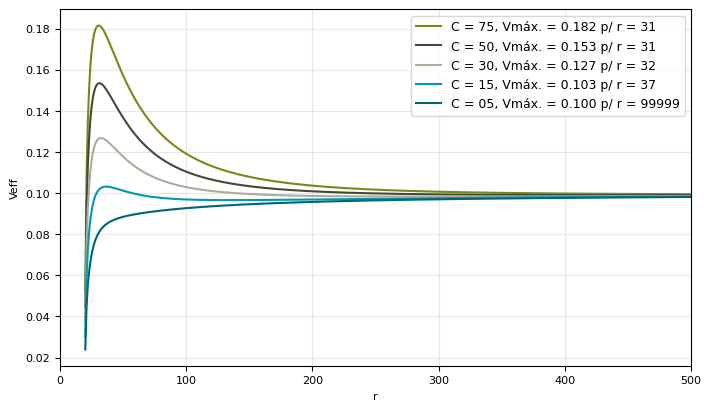

In [ ]:
# Definindo o tamanho da figura
plt.figure(figsize = (7, 4), constrained_layout = True)

# Lista que conterá os valores de energia do pico de cada curva e seus respectivos raios
energias_dos_picos = []
raios_dos_picos = []

# Agrupamento dos valores do análago do potencial no dicionário e plot de cada curva
for valor, cor, curva in zip(C, cores, range(0, 5)):

  # Raio do horizonte de eventos e da ergosfera
  rh = M + sqrt(M**2 - parametros['a']**2)
  re = M + sqrt(M**2 - parametros['a']**2 * cos(theta)**2)

  # Utilizando da função para determinar os valores do análogo do potencial e armazenando todos em listas
  arranjo_do_veff = [v_eff(r = arranjo_de_r[interação], G = G, M = M, **parametros, C = valor) for interação in range(N)]

  # Salvando a energia do pico e seu respectivo raio para inserir na figura
  for iniciais in range(0, 5):
    arranjo_do_veff[iniciais] = nan
  energia_do_pico = nanmax(arranjo_do_veff)
  energias_dos_picos.append(energia_do_pico)
  r_do_pico = arranjo_do_veff.index(energia_do_pico)
  raios_dos_picos.append(r_do_pico)

  # Adicionando a curva à figura
  plt.plot(arranjo_de_r,
           arranjo_do_veff,
           color = cores[curva],
           label = f'C = {valor:02}, Vmáx. = {energia_do_pico:.3f} p/ r = {r_do_pico}')

# Valores mínimos e máximos da figura atribuidos pelo próprop matplotlib.pyplot
xmin, xmax, ymin, ymax = plt.axis()

# Adicionando detalhes à figura
plt.xlabel(f'r', fontsize = 8)
plt.xlim(xmin = 0, xmax = 500)
plt.xticks(fontsize = 8)
plt.ylabel('Veff', fontsize = 8)
plt.ylim(ymin = ymin, ymax = ymax)
plt.yticks(fontsize = 8)
plt.legend(fontsize = 9)
plt.grid(True, alpha = 0.3)

# Apresentando a figura
plt.show()

### Figura com 1 potencial

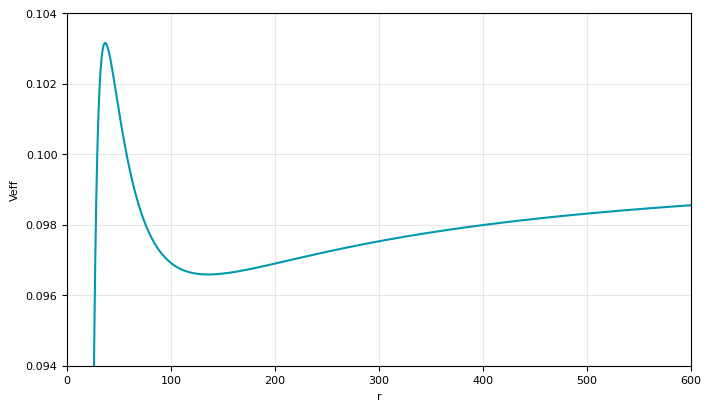

In [ ]:
# Definindo o tamanho da figura
plt.figure(figsize = (7, 4), constrained_layout = True)

# Lista que conterá os valores de energia do pico de cada curva e seus respectivos raios
energias_dos_picos = []
raios_dos_picos = []

# Agrupamento dos valores do análago do potencial no dicionário e plot de cada curva
for valor, cor, curva in zip(C, cores, range(0, 5)):

  # Raio do horizonte de eventos e da ergosfera
  rh = M + sqrt(M**2 - parametros['a']**2)
  re = M + sqrt(M**2 - parametros['a']**2 * cos(theta)**2)

  # Utilizando da função para determinar os valores do análogo do potencial e armazenando todos em listas
  arranjo_do_veff = [v_eff(r = arranjo_de_r[interação], G = G, M = M, **parametros, C = valor) for interação in range(N)]

  # Salvando a energia do pico e seu respectivo raio para inserir na figura
  for iniciais in range(0, 5):
    arranjo_do_veff[iniciais] = nan
  energia_do_pico = nanmax(arranjo_do_veff)
  energias_dos_picos.append(energia_do_pico)
  r_do_pico = arranjo_do_veff.index(energia_do_pico)
  raios_dos_picos.append(r_do_pico)

  # Adicionando a curva à figura
  ## Escolhemos a curva de interesse conforme o valor C dela
  if valor == 15:
    plt.plot(arranjo_de_r,
            arranjo_do_veff,
            color = cores[curva])

# Adicionando detalhes à figura
plt.xlabel(f'r', fontsize = 8)
plt.xlim(xmin = 0, xmax = 600)
plt.xticks(fontsize = 8)
plt.ylabel('Veff', fontsize = 8)
plt.ylim(ymin = 0.094, ymax = 0.104)
plt.yticks(fontsize = 8)
plt.grid(True, alpha = 0.3)

# Apresentando a figura
plt.show()

## Geodésicas
___

### Função para a figura com uma única geodésica

In [ ]:
# Curva e energia de interesse para a trajetória
curva_de_interesse = C[0]
## Para o pico: energias_dos_picos[]
energia_de_interesse = energias_dos_picos[0]

def geodesica_unica(E = energia_de_interesse,
                    G = G,
                    M = M,
                    theta = theta,
                    a = parametros["a"],
                    L = parametros["L"],
                    C = curva_de_interesse,
                    mu = parametros["mu"],
                    N = N):

  # Correção da cor conforme o tipo de partícula teste
  if mu == 0:
    cor = '#0000D6'
  else:
    cor = '#D60000'

  # Raio do horizonte de eventos, da ergosfera e construção do arranjo de r para as diferenças finitas
  rh = G*M + sqrt(G**2 * M**2 - a**2)
  re = G*M + sqrt(G**2 * M**2 - a**2 * cos(theta)**2)
  r = [0] * N

  # Para o pico: raios_dos_picos[]
  r[0] = 30.9

  # Alcance do ângulo phi para projeção da trajetória pelas diferenças finitas
  phi_i = 0
  phi_f = 2*pi
  phi = linspace(phi_i, phi_f, N)
  h = (phi_f - phi_i)/N

  # Cálculo pelas diferenças finitas
  for n in range(0, N-1):
    P = E * (r[n]**2 + a**2) - L * a
    Delta = r[n]**2 - 2 * G * M * r[n] + a**2
    R = P**2 - Delta * (mu**2 * r[n]**2 + (L - a * E)**2 + C)
    num = -sqrt(R)
    den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
    traj = num / den
    r[n+1] = traj * h + r[n]

  ## Adequando a quantidade de valores que serão trabalhados do array de r antes dos resultados NaN (o -1 é para ajustar o valor por causa do índice 0)
  qnt = count_nonzero(~isnan(r))-1

  # Figura
  ## Configurando o alcance de observação phi
  phi_obs_i = 0
  phi_obs_f = 6*pi
  phi_obs = linspace(phi_obs_i, phi_obs_f, qnt)

  ## Selecionando os valores do array de r que irão para o boxplot e para o plot polar
  r_obs = r[:qnt]

  ## Construção da trajetória em coordenadas polares
  plt.figure(figsize = (8, 4), constrained_layout = True)
  plt.subplot(111, projection = 'polar')
  plt.polar(phi_obs, r_obs, color = cor)
  plt.ylim(rh, r[0])
  plt.grid(True, alpha = 0.3)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)

  return plt.show()

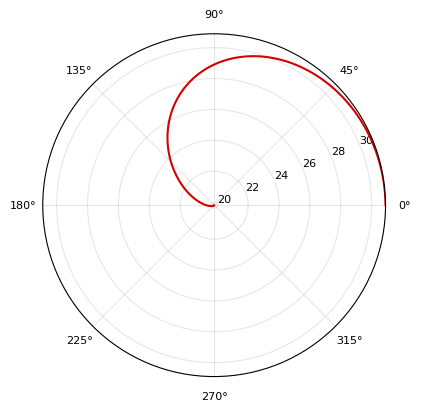

In [ ]:
geodesica_unica()

### Função para a figura com quatro geodésicas

In [ ]:
# Curva e energia de interesse para a trajetória
curva_de_interesse = C[0]
## Para o pico: energias_dos_picos[]
energias_de_interesse = [0.177, energias_dos_picos[0], 0.179, 0.180]

def geodesicas_com_diferentes_energias(E = energias_de_interesse,
                                       G = G,
                                       M = M,
                                       theta = theta,
                                       a = parametros["a"],
                                       L = parametros["L"],
                                       C = curva_de_interesse,
                                       mu = parametros["mu"],
                                       N = N):

  # Coloaração das curvas
  cores = ['#6F8C1C', '#454839', '#AAAD9B', '#0099AD']

  # Raio do horizonte de eventos, da ergosfera e construção do arranjo de r para as diferenças finitas
  rh = G*M + sqrt(G**2 * M**2 - a**2)
  re = G*M + sqrt(G**2 * M**2 - a**2 * cos(theta)**2)

  # Alcance do ângulo phi para projeção da trajetória pelas diferenças finitas
  phi_i = 0
  phi_f = 2*pi
  phi = linspace(phi_i, phi_f, N)
  h = (phi_f - phi_i)/N

  # Formato da figura
  plt.figure(figsize = (8, 4), constrained_layout = True)
  plt.subplot(111, projection = 'polar')

  # Construção do arranjo e distribuição da coloração
  for E, cor in zip(energias_de_interesse, cores):
    r = [0] * N

    # Para o pico: raios_dos_picos[]
    # r[0] = 30.9
    r[0] = 30.9210731879

    # Cálculo pelas diferenças finitas
    for n in range(0, N-1):
      P = E * (r[n]**2 + a**2) - L * a
      Delta = r[n]**2 - 2 * G * M * r[n] + a**2
      R = P**2 - Delta * (mu**2 * r[n]**2 + (L - a * E)**2 + C)
      num = -sqrt(R)
      den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
      traj = num / den
      r[n+1] = traj * h + r[n]

    ## Configurando o alcance da observação phi
    phi_obs_i = 0
    phi_obs_f = 6*pi
    phi_obs = linspace(phi_obs_i, phi_obs_f, len(r))

    ## Plotando a curva
    plt.polar(phi_obs,
              r,
              color = cor,
              label = f'E = {E:.3f}')

  ## Construção da trajetória em coordenadas polares
  plt.ylim(rh, r[0])
  plt.grid(True, alpha = 0.3)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)
  plt.legend(bbox_to_anchor = (1.1, 0.65),
             fontsize = 9)

  return plt.show()

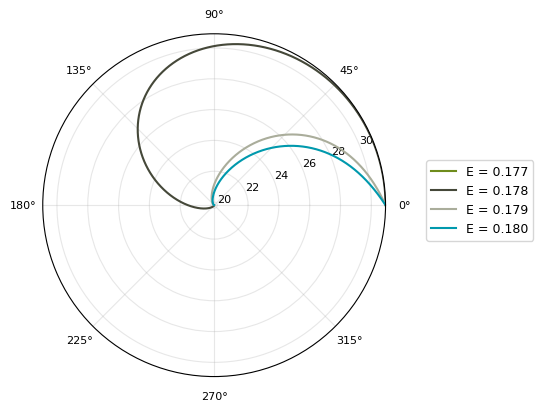

In [ ]:
geodesicas_com_diferentes_energias()

### Função para a figura com uma geodésica alterando seu sentido

In [ ]:
# Curva e energia de interesse para a trajetória
curva_de_interesse = C[0]
## Para o pico: energias_dos_picos[]
energia_de_interesse = energias_dos_picos[0]

def geodesica_com_mudanca_sentido(E = energia_de_interesse,
                                  G = G,
                                  M = M,
                                  theta = theta,
                                  a = parametros["a"],
                                  L = parametros["L"],
                                  C = curva_de_interesse,
                                  mu = parametros["mu"],
                                  N = N):

  # Correção da cor conforme o tipo de partícula teste
  if mu == 0:
    cor = '#0000D6'
  else:
    cor = '#D60000'

  # Raio do horizonte de eventos, da ergosfera e construção do arranjo de r para as diferenças finitas
  rh = G*M + sqrt(G**2 * M**2 - a**2)
  re = G*M + sqrt(G**2 * M**2 - a**2 * cos(theta)**2)

  # Para a curva inicial
  r = [0] * N
  r[0] = 24.55

  # Par a curva que se conecta
  rc = [0] * N
  rc[0] = 24.65

  # Alcance do ângulo phi para projeção da trajetória pelas diferenças finitas
  phi_i = 0
  phi_f = 2*pi
  phi = linspace(phi_i, phi_f, N)
  h = (phi_f - phi_i)/N

  # Cálculo pelas diferenças finitas para a curva inicial
  for n in range(0, N-1):
    P = E * (r[n]**2 + a**2) - L * a
    Delta = r[n]**2 - 2 * G * M * r[n] + a**2
    R = P**2 - Delta * (mu**2 * r[n]**2 + (L - a * E)**2 + C)
    num = -sqrt(R)
    den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
    traj = num / den
    r[n+1] = traj * h + r[n]

  # Diferenças finitas para a curva que se conecta
  for n in range(0, N-1):
    P = E * (rc[n]**2 + a**2) - L * a
    Delta = rc[n]**2 - 2 * G * M * rc[n] + a**2
    R = P**2 - Delta * (mu**2 * rc[n]**2 + (L - a * E)**2 + C)
    num = -sqrt(R)
    den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
    traj = num / den
    rc[n+1] = traj * h + rc[n]

  # Figura
  ## Adequando a quantidade de valores que serão trabalhados do array de r antes dos resultados NaN (o -1 é para ajustar o valor por causa do índice 0) para a curva que se conecta
  qnt = count_nonzero(~isnan(rc))-1

  ## Configurando o alcance da observação phi
  phi_obs_i = 0
  phi_obs_f = 6*pi
  phi_obs = linspace(phi_obs_i, phi_obs_f, N)

  ## Para a curva que se conecta
  phi_obs_c = linspace(phi_obs_i, phi_obs_f, qnt)
  rc_obs = rc[:qnt]

  ## Construção da trajetória em coordenadas polares
  plt.figure(figsize = (8, 4), constrained_layout = True)
  plt.subplot(111, projection = 'polar')
  plt.polar(phi_obs, r, color = cor)
  plt.polar(phi_obs_c, rc_obs, color = cor)
  plt.ylim(rh, rc_obs[-1])
  plt.grid(True, alpha = 0.3)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)

  return plt.show()

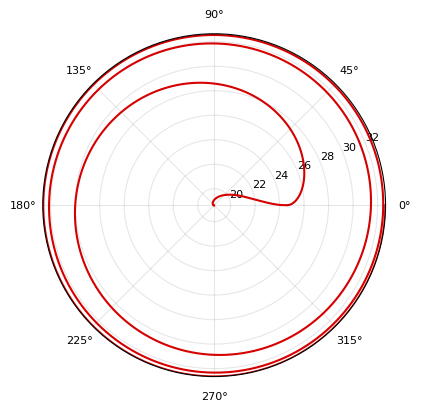

In [ ]:
geodesica_com_mudanca_sentido()

### Função para a figura com uma geodésica elíptica

In [ ]:
# Curva e energia de interesse para a trajetória
curva_de_interesse = C[3]
# Para o pico: energias_dos_picos[]
energia_de_interesse = 0.0985

def geodesica_eliptica(E = energia_de_interesse,
                       G = G,
                       M = M,
                       theta = theta,
                       a = parametros["a"],
                       L = parametros["L"],
                       C = curva_de_interesse,
                       mu = parametros["mu"],
                       N = N):

  # Raio do horizonte de eventos, da ergosfera e construção do arranjo de r para as diferenças finitas
  rh = G*M + sqrt(G**2 * M**2 - a**2)
  re = G*M + sqrt(G**2 * M**2 - a**2 * cos(theta)**2)
  r = [0] * N

  # Para o pico: raios_dos_picos[]
  r[0] = 69.47

  # Mesmo procedimento para a curva que se conecta
  rc = [0] * N
  rc[0] = 574.20

  # Alcance do ângulo phi para projeção da trajetória pelas diferenças finitas
  phi_i = 0
  phi_f = 2*pi
  phi = linspace(phi_i, phi_f, N)
  h = (phi_f - phi_i)/N

  # Cálculo pelas diferenças finitas para a curva inicial
  for n in range(0, N-1):
    P = E * (r[n]**2 + a**2) - L * a
    Delta = r[n]**2 - 2 * G * M * r[n] + a**2
    R = P**2 - Delta * (mu**2 * r[n]**2 + (L - a * E)**2 + C)
    num = sqrt(R)
    den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
    traj = num / den
    r[n+1] = traj * h + r[n]

  # Diferenças finitas para a curva que se conecta
  for n in range(0, N-1):
    P = E * (rc[n]**2 + a**2) - L * a
    Delta = rc[n]**2 - 2 * G * M * rc[n] + a**2
    R = P**2 - Delta * (mu**2 * rc[n]**2 + (L - a * E)**2 + C)
    num = -sqrt(R)
    den = -(a*E - L / sin(theta)**2) + (a / Delta) * P
    traj = num / den
    rc[n+1] = traj * h + rc[n]

  # Figura
  ## Adequando a quantidade de valores que serão trabalhados do array de r antes dos resultados NaN (o -1 é para ajustar o valor por causa do índice 0)
  qnt = count_nonzero(~isnan(r))-1
  ## Memso procedimento para a curva que se conecta
  qntc = count_nonzero(~isnan(rc))-1

  ## Configurando o alcance da observação phi
  phi_obs_i = 0
  phi_obs_f = 6*pi
  phi_obs = linspace(phi_obs_i, phi_obs_f, qnt)
  ## Igual para a curva que se conecta
  phi_obs_c = linspace(phi_obs_i, phi_obs_f, qntc)

  ## Selecionando os valores do array de r que irão para o boxplot e para o plot polar
  r_obs = r[:qnt]
  ## Para a curva conectando
  rc_obs = rc[:qntc]

  ## Construção da trajetória em coordenadas polares
  plt.figure(figsize = (8, 4), constrained_layout = True)
  plt.subplot(111, projection = 'polar')
  plt.polar(phi_obs, r_obs, color = '#82D682')
  plt.polar(phi_obs_c, rc_obs, color = '#777A48')
  plt.grid(True, alpha = 0.3)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)

  return plt.show()

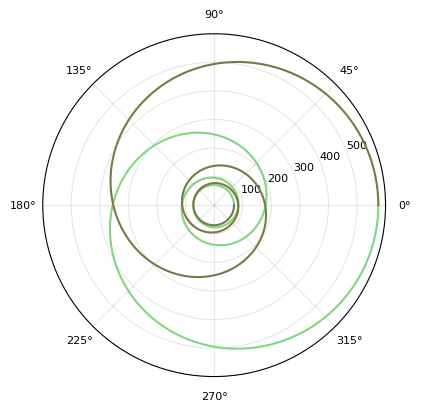

In [ ]:
geodesica_eliptica()